### Matrículas por Dependência Administrativa

> *Como se divide a cobertura da educação básica entre os tipos de escola Federal, Estadual, Municipal, e Privada?*

*Trazendo as ferramentas necessárias*

In [1]:
import pandas as pd
import altair as alt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

*Importando a base de dados do censo que comprreende os anos de 2007 até 2022.*

> Os dados foram unificados anteriormente [nesse caderno](https://github.com/Lorenaps/educacao-brasileira/blob/main/etl/censo_escolar.ipynb).

In [2]:
%%time

censo = pd.read_csv('/content/drive/MyDrive/dados/output/baseCensoEscolar.csv', encoding='latin-1')
censo.head(5)

CPU times: user 21.4 s, sys: 9.42 s, total: 30.8 s
Wall time: 38.5 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,NO_ENTIDADE,CO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,TP_SITUACAO_FUNCIONAMENTO,QT_MAT_BAS,QT_MAT_INF,QT_MAT_FUND,QT_MAT_MED,QT_MAT_PROF,QT_MAT_PROF_TEC,QT_MAT_EJA,QT_MAT_ESP,QT_MAT_BAS_FEM,QT_MAT_BAS_MASC,QT_MAT_BAS_ND,QT_MAT_BAS_BRANCA,QT_MAT_BAS_PRETA,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2022,Norte,1,RondÃ´nia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EIEEF HAP BITT TUPARI,11022558,2,NaN,2,2.0,1,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,4.0,4.0,0.0
1,2022,Norte,1,RondÃ´nia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,CEEJA LUIZ VAZ DE CAMOES,11024275,2,NaN,1,0.0,1,200.0,0.0,0.0,0.0,0.0,0.0,200.0,3.0,114.0,86.0,0.0,53.0,5.0,132.0,0.0,10.0,15.0,0.0,0.0,0.0,10.0,0.0,0.0
2,2022,Norte,1,RondÃ´nia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EMMEF 7 DE SETEMBRO,11024291,3,NaN,2,0.0,1,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,3.0,0.0,6.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2022,Norte,1,RondÃ´nia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EMEIEF ANA NERY,11024372,3,NaN,1,0.0,1,118.0,17.0,101.0,0.0,0.0,0.0,0.0,1.0,53.0,65.0,13.0,15.0,6.0,62.0,0.0,22.0,8.0,1.0,7.0,0.0,8.0,7.0,0.0
4,2022,Norte,1,RondÃ´nia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EMEIEF BOA ESPERANCA,11024666,3,NaN,2,0.0,1,161.0,18.0,143.0,0.0,0.0,0.0,0.0,3.0,76.0,85.0,9.0,59.0,2.0,91.0,0.0,0.0,20.0,1.0,19.0,0.0,9.0,8.0,0.0


De acordo ao Dicionário de Dados disponível no conjunto de dados do Censo Escolar 2022 do INEP, as colunas que vamos precisar olhar para responder essa pergunta é:

- TP_DEPENDENCIA: Que descreve a Dependência Administrativa e tem como referência os valores (1 - Federal, 2 - Estadual, 3 - Municipal, 4 - Privada);

- QT_MAT_BAS: Que descreve o Número de Matrículas na Educação Básica;

Dessa forma, para respondermos a nossa pergunta, fazemos:

In [3]:
dados = censo[['TP_DEPENDENCIA', 'QT_MAT_BAS', 'NU_ANO_CENSO']]
dados[['TP_DEPENDENCIA', 'QT_MAT_BAS',]].groupby(['TP_DEPENDENCIA']).sum().reset_index().sort_values('QT_MAT_BAS', ascending=False)

,TP_DEPENDENCIA,QT_MAT_BAS
2,3,374078519.0
1,2,283157756.0
3,4,133283903.0
0,1,5101413.0


Agora vamos substituir os valores de referência das dependências pelo seus significados:

In [4]:
dados.dtypes

TP_DEPENDENCIA      int64
QT_MAT_BAS        float64
NU_ANO_CENSO        int64
dtype: object

In [5]:
dados.loc[dados['TP_DEPENDENCIA'] == 1, ['TP_DEPENDENCIA']] = 'Federal'
dados.loc[dados['TP_DEPENDENCIA'] == 2, ['TP_DEPENDENCIA']] = 'Estadual'
dados.loc[dados['TP_DEPENDENCIA'] == 3, ['TP_DEPENDENCIA']] = 'Municipal'
dados.loc[dados['TP_DEPENDENCIA'] == 4, ['TP_DEPENDENCIA']] = 'Privada'

dados[['TP_DEPENDENCIA', 'QT_MAT_BAS',]].groupby(['TP_DEPENDENCIA']).sum().reset_index().sort_values('QT_MAT_BAS', ascending=False)

,TP_DEPENDENCIA,QT_MAT_BAS
2,Municipal,374078519.0
0,Estadual,283157756.0
3,Privada,133283903.0
1,Federal,5101413.0


Para visualizarmos a distribuição das matrículas ao longo dos anos podemos agrupar os dados da seguinte forma:

In [6]:
dados.groupby(['TP_DEPENDENCIA', 'NU_ANO_CENSO']).sum().reset_index().sort_values(['NU_ANO_CENSO', 'QT_MAT_BAS'], ascending=False)

,TP_DEPENDENCIA,NU_ANO_CENSO,QT_MAT_BAS
47,Municipal,2022,23240028.0
15,Estadual,2022,14761395.0
63,Privada,2022,9000046.0
31,Federal,2022,380605.0
46,Municipal,2021,23135793.0
14,Estadual,2021,15019116.0
62,Privada,2021,8136345.0
30,Federal,2021,377147.0
45,Municipal,2020,22898611.0
13,Estadual,2020,15199500.0


para melhorar o nosso entendimento vamos adicionar uma visualização de dados usando a biblioteca [Vega-Altair](https://altair-viz.github.io/getting_started/overview.html)

In [7]:
dados = dados.groupby(['TP_DEPENDENCIA', 'NU_ANO_CENSO']).sum().reset_index().sort_values('QT_MAT_BAS', ascending=False)

alt.Chart(dados).mark_line(point=True).encode(
    x=alt.X('NU_ANO_CENSO:N', title='Ano'),
    y=alt.Y('QT_MAT_BAS', title='Matrículas'),
    color=alt.Color('TP_DEPENDENCIA', title="Dependência Administrativa"),
).interactive()

alt.Chart(...)

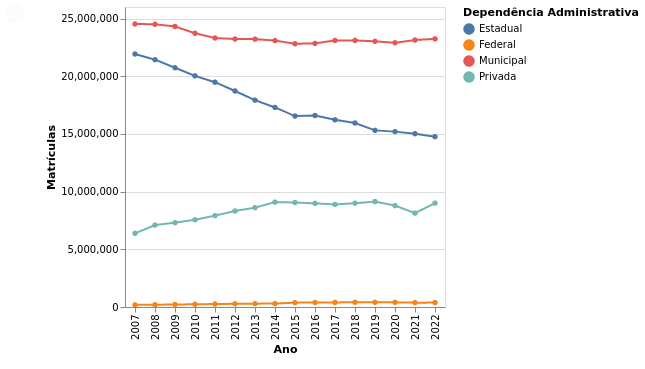

**Observações iniciais:** *A rede municipal segue ao longo dos anos como a principal responsável pela formação dos jovens da educação básica. Mas é interessante observar a queda de matrículas na rede estadual e até mesmo na municipal em alguns anos (2012 a 2015) ao passo que as matrículas foram aumentando na rede privada, inclusive seu novo pico com a retomada das aulas presenciais em 2022. É interessante fazer uma complementação dessas observações com outras referências e fontes de análise*

**Status:** Esse caderno ainda está em processo de desenvolvimento e revisão.